In [1]:
def function(x):
    return x[0]**2 + 8*x[0] + 5*x[1]**2 + 7*x[2]**2 + 119*x[2] + 531.75
def f(x,z):
    return np.sqrt(x*x + 8*x + 7*z*z + 119*z + 531.75)
def f_(x,z):
    return -np.sqrt(x*x + 8*x + 7*z*z + 119*z + 531.75)

In [2]:
from mpl_toolkits.mplot3d import Axes3D
def f(x,z):
    return np.sqrt(x*x + 8*x + 7*z*z + 119*z + 531.75)
def f_(x,z):
    return -np.sqrt(x*x + 8*x + 7*z*z + 119*z + 531.75)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y,f(X,Y), cmap='viridis')
ax.plot_surface(X, Y,f_(X,Y), cmap='magma')

NameError: name 'plt' is not defined

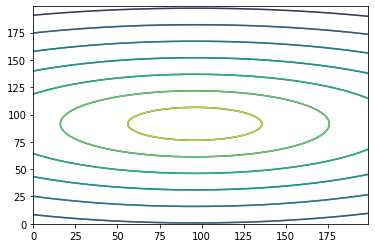

In [3]:
#line
import numpy as np
import matplotlib.pyplot as plt
from math import *
X,Y = np.meshgrid(np.arange(-100,100,1) , np.arange(-100,100,1))
Z = f(X,Y)
U = f_(X,Y)
plt.contour(Z)
plt.contour(U)
plt.show()

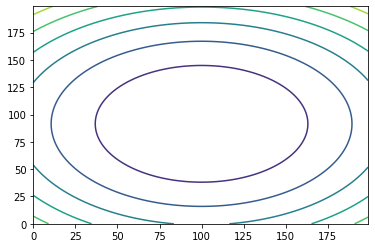

In [4]:
X,Y = np.meshgrid(np.arange(-100,100,1) , np.arange(-100,100,1))
Z = function([1,X,Y])
plt.contour(Z)
plt.show()

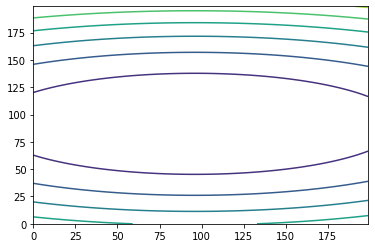

In [5]:
X,Y = np.meshgrid(np.arange(-100,100,1) , np.arange(-100,100,1))
Z = function([X,2,Y])
plt.contour(Z)
plt.show()

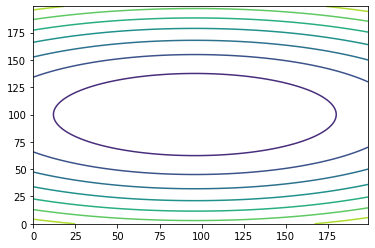

In [6]:
X,Y = np.meshgrid(np.arange(-100,100,1) , np.arange(-100,100,1))
Z = function([X,Y,3])
plt.contour(Z)
plt.show()

In [8]:
#одномерная оптимизация 
# метод Скользящего окна 
def slidingWindow(x0,h):
        if func(x0-h)>func(x0) and func(x0)<func(x0+h):
            return [x0-h , x0+h]
        elif func(x0-h)>func(x0+h):
            x0 = x0+h/2
            return [x0-h , x0+h]
        else:
            x0 = x0+h/2
            return [x0-h , x0+h]
def KvadrInterpolate(a,b):
    while(True):
        x1 = (a+b)/2
        h = 0.1
        x2 = x1+2*h
        if (func(x1)>func(x2)):
            x3 = x1+2*h
        else:
            x3 = x1-2*h
        xmin = 0
        if func(x1) <=func(x2) and func(x1)<=func(x3):
            xmin = func(x1)
        elif func(x2) <=func(x1) and func(x2)<=func(x3):
            xmin = func(x2)
        else:
            xmin = func(x3)
        if (x2-x3)==0 or (x1-x2)==0 or (x3-x1) ==0:
            x1 = xmin
            continue
        else :
            x_ = 1/2*((x2**2 - x3**2)*func(x1)+(x3**2 - x1**2)*func(x2) +(x1**2-x2**2)*func(x3))/((x2-x3)*func(x1)+(x3-x1)*func(x2)+(x1-x2)*func(x3))

In [10]:
#GoldenSearch
def GoldenSearch(x,eps):
	tmin = 0.01
	tmax = 10
	y0=0
	z0=0
	while (abs(tmin - tmax) > eps) :
		y0 = tmax - (tmax - tmin) / ((1 + sqrt(5)) / 2)
		z0 = tmin + (tmax - tmin) / ((1 + sqrt(5)) / 2)
		if (functionOneVariable(x,y0) > functionOneVariable(x, z0)):
			tmin = y0
		else:
			tmax = z0
	return (tmax + tmin) / 2

In [15]:
# метод наискорейшего спуска
def dfdxi(x,j):
    dxi = pow(10,-5)
    vectorX = []
    for i in range(len(x)):
        if (i == j-1):
            vectorX.append(x[i] + dxi)
        else:
            vectorX.append(x[i])
    return (function(vectorX) - function(x))/dxi
def gradient(x):
    return [dfdxi(x,1) , dfdxi(x,2), dfdxi(x,3)]
def NormEvklid(x):
    res = 0
    for elem in x:
        res+=elem**2
    return sqrt(res)
def functionOneVariable( x,  tk):
	grad = gradient(x)
	newVector = [x[0] - tk * grad[0], x[1] - tk * grad[1] , x[2] - tk * grad[2]]
	return function(newVector)




In [16]:
mas_x = []
def step3(eps1, x , k) :
	norm = NormEvklid(gradient(x[k]))
	if (norm < eps1) :
		print("Solution = ")
		mas_x.append(x[k])
		for i in range(3) :
			print(x[k][i],end = ' ')
		print()
		sys.exit(0)
def step4(x , eps):
	tk = GoldenSearch(x, eps)
	return tk
def step5(x, k ,  eps) :
	tk = step4(x[k], eps)
	grad = gradient(x[k])
	xk = [x[k][0] - tk*grad[0], x[k][1] - tk*grad[1] , x[k][2] - tk*grad[2]]
	x.append(xk)
	mas_x.append(xk)
def Search():
  n = 3
  kmax = 100
  k = 0
  eps = pow(10,-4)
  x0 = [1,1,1]
  x = []
  x.append(x0)
  mas_x.append(x0)
  while (True) :
    step3(eps, x, k)
    step5(x, k, eps)
    diff = [x[k + 1][0] - x[k][0] , x[k + 1][1]-x[k][1],x[k + 1][2]-x[k][2]]
    norm = NormEvklid(diff)
    if (norm < eps) :
      print("Solution = ")
      mas_x.append(x[k])
      for i in range(3) :
        print(x[k][i],end = ' ')
      print()
      sys.exit(0)
    else :
      k+=1
      if k == kmax:
        print("Solution = ")
        mas_x.append(x[k])
        for i in range(3) :
          print(x[k][i], end = ' ')
        print()


In [17]:
Search()

Solution = 
-3.9997925219731116 -5.000020101624566e-06 -8.499936017335973 


SystemExit: 0

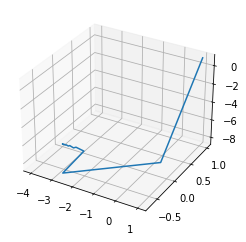

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mas_0 = []
mas_1 = []
mas_2 = []
for elem in mas_x:
    mas_0.append(elem[0])
    mas_1.append(elem[1])
    mas_2.append(elem[2])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(mas_0,mas_1,mas_2, label='parametric curve')

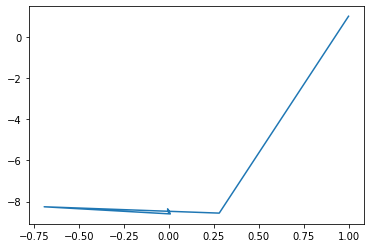

In [23]:
plt.plot(mas_1,mas_2)
plt.show()

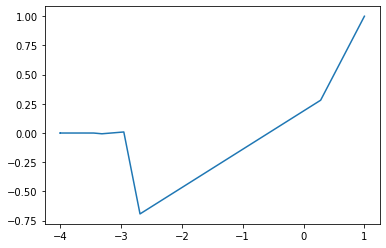

In [24]:
plt.plot(mas_0,mas_1)
plt.show()

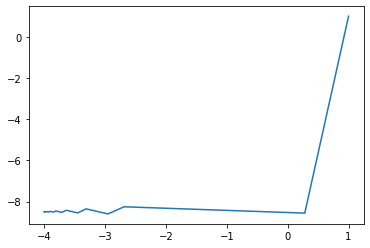

In [25]:
plt.plot(mas_0,mas_2)
plt.show()
